# Домашнее задание №5. Перцептрон
В этом задании не важно, насколько хорошими получатся результаты обучения. Пока важно лишь научиться обрабатывать данные и проводить обучение на них.

## Задание 1
Загрузите датасет Titanic с Kaggle по ссылке: https://www.kaggle.com/competitions/titanic/data?select=train.csv (пока ограничимся только train.csv). Создайте pandas.DataFrame для его хранения.

In [12]:
import pandas as pd

In [13]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Задание 2
Преобразуйте DataFrame так, чтобы в нем остались только числовые данные. Некоторые незначащие столбцы можно исключить, некоторые надо просто преобразовать.

In [14]:
''' 
PassengerId - Число (оставляю)
Survived - Число (оставляю)
Pclass - Число (оставляю)
Name - Строка (Убираю)
Sex - Замена (1 - мужчина, 0 - женщина)
Age - Число (оставляю) 
SibSp - Число (оставляю)
Parch - Число (оставляю)
Ticket - Строка (Убираю)
Fare - Число (оставляю)
Cabin - Строка (Убираю)
Embarked - Строка (Убираю)
'''
train_data['Sex'] = (train_data['Sex'] == 'male').astype(int)

In [15]:
train_data = train_data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


## Задание 3
Разделите получившийся DataFrame на обучающую (80%) и тестовую выборку (20%). Отдельно выделите столбец, который модель будет предсказывать, у нас это будет столбец с данными о том, выжил ли пассажир.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = train_data.drop('Survived', axis=1)     # Входные параметры (все столбики, кроме Survived (потому что его надо предсказать))
y = train_data['Survived']                  # Результаты (столбик Survived)

# Разделение выборки на тестовую (20%) и обучающую (100-20=80%), random_state - для получения одних и тех же результатов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Задание 4
Используйте обучающую выборку для обучение перцептрона (используйте класс, написанный на семинаре, либо sklearn.linear_model.Perceptron). Выведите точность полученной модели на тестовой выборке.

In [18]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [19]:
model = Perceptron(max_iter=1000, random_state=42)
model.fit(x_train, y_train)     # Обучение модели (1000 итераций), использую обучающую выборку: есть входные параметры (x_train) и ответы (столбец Survived в y_train)

y_pred = model.predict(x_test)              # Теперь тестирую выборку: пытаюсь предсказать результаты на x_test. Получившиеся ответы записываю в y_pred
accuracy = accuracy_score(y_test, y_pred)   # Сравниваю то что получилось (y_pred) и то что было в тестовых ответах (y_test)
print(f'Точность модели на тестовой выборке: {accuracy}')   

Точность модели на тестовой выборке: 0.4125874125874126


**Оценка точности**

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt  # Средство визуализации данных и построения графиков

In [21]:
def get_metrics_plot_confusion_matrix(clf, y_test, y_pred):
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)  # Матрица ошибок
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)     # Отображение матрицы ошибок
  disp.plot()
  plt.show()

              precision    recall  f1-score   support

           0       0.59      0.11      0.19        87
           1       0.39      0.88      0.54        56

    accuracy                           0.41       143
   macro avg       0.49      0.49      0.37       143
weighted avg       0.51      0.41      0.33       143



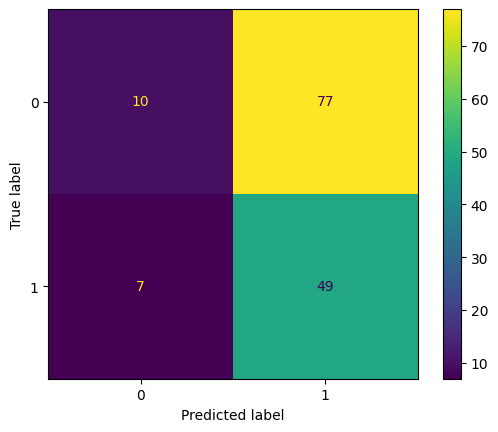

In [22]:
# Оценка на тестовой выборке
get_metrics_plot_confusion_matrix(model, y_test, y_pred)